In [343]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import pandas as pd

In [344]:
# Load the data
data = pd.read_csv('Anime.csv')
print(data.head())

#store the number of rows in the data
num_rows = data.shape[0]


   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

In [345]:
##Data Cleaning

#giving each studio a unique id number and add it to the data
studios = data['Studio'].unique()
studio_ids = range(1, len(studios) + 1)
studio_dict = dict(zip(studios, studio_ids))
data['Studio_ID'] = data['Studio'].map(studio_dict)
print(data.head())

#Removing unwanted data columns
data = data.drop('End_year', axis=1)
data = data.drop('staff', axis=1)
data = data.drop('Voice_actors', axis=1)
data = data.drop('Description', axis=1)
data = data.drop('Name', axis=1)
data = data.drop('Japanese_name', axis=1)
data = data.drop('Type', axis=1)
data = data.drop('Tags', axis=1)
data = data.drop('Related_Mange', axis=1)
data = data.drop('Related_anime', axis=1)
data = data.drop('Rank', axis=1)
data = data.drop('Release_season', axis=1)
data = data.drop('Release_year', axis=1)
data = data.drop('Studio', axis=1)
data = data.drop('Content_Warning', axis=1)

#remove rows that have studios with less than 10 shows
#print the names of the columns in the data
print(data.columns)

#Remove the rows with missing values
data = data.dropna()

#store and print the number of rows after removing the missing values
num_rows_cleaned = data.shape[0]
print(num_rows_cleaned)

print("=====================")

##Indexing

#Give every show a unique id number
data['ID'] = range(1, num_rows_cleaned + 1)
print(data.head())

#create a csv file that contains the shows and the studios that produced them
data[['ID', 'Studio_ID']].to_csv('show_studio.csv', index=False)

#print the maximum studio id
max_studio_id = data['Studio_ID'].max()

print("Number of studios: ",max_studio_id)


   Rank                                               Name  \
0     1  Demon Slayer: Kimetsu no Yaiba - Entertainment...   
1     2                     Fruits Basket the Final Season   
2     3                                    Mo Dao Zu Shi 3   
3     4                   Fullmetal Alchemist: Brotherhood   
4     5                Attack on Titan 3rd Season: Part II   

                                     Japanese_name   Type  Episodes  \
0                    Kimetsu no Yaiba: Yuukaku-hen  TV          NaN   
1                          Fruits Basket the Final  TV         13.0   
2                       The Founder of Diabolism 3  Web        12.0   
3   Hagane no Renkinjutsushi: Full Metal Alchemist  TV         64.0   
4             Shingeki no Kyojin Season 3: Part II  TV         10.0   

              Studio Release_season  \
0           ufotable          Fall    
1  TMS Entertainment         Spring   
2   B.C MAY PICTURES            NaN   
3              Bones         Spring   
4    

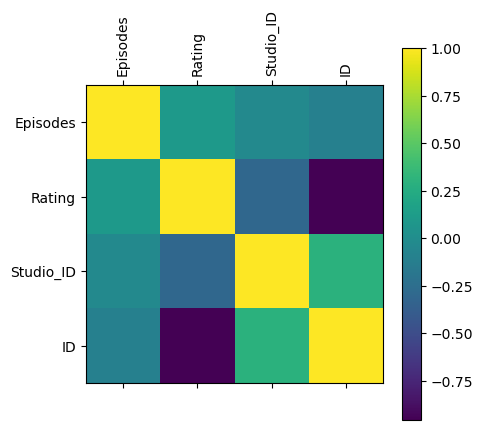

In [347]:
# Convert string values to numeric values
data = data.apply(pd.to_numeric, errors='coerce')

# Plot the correlation matrix
correlation_matrix = data.corr()
plt.matshow(correlation_matrix)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation='vertical')
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.colorbar()
plt.show()

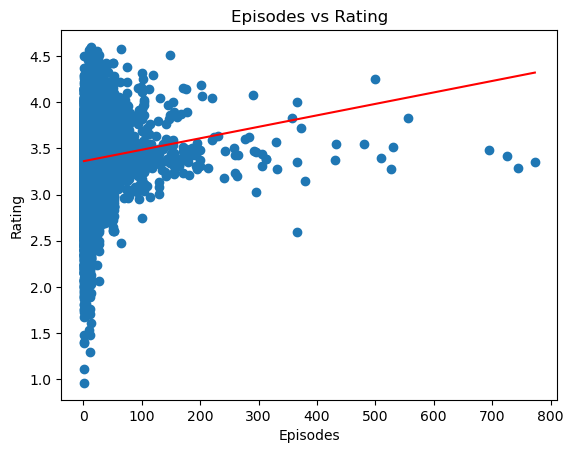

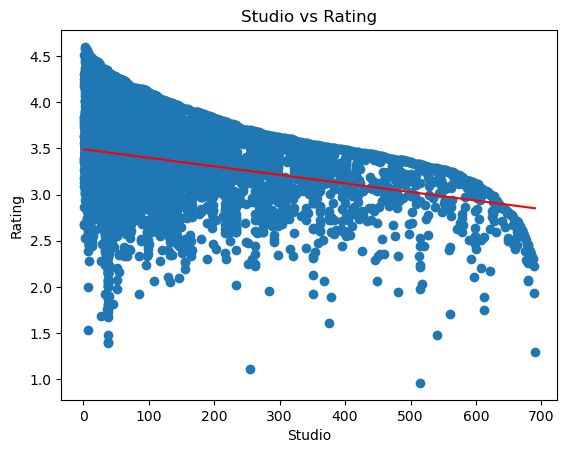

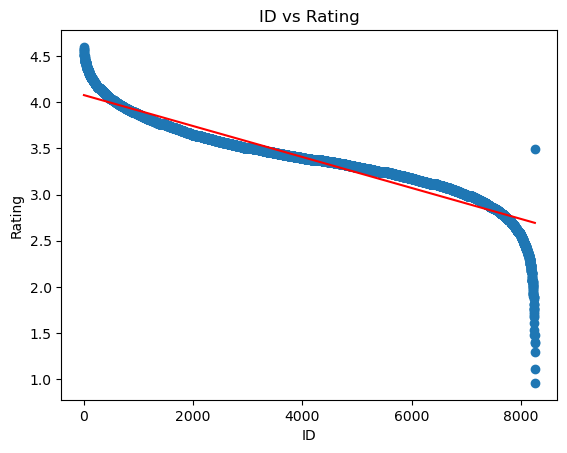

In [348]:
##Multivariate Analysis

# Plot the data
plt.title('Episodes vs Rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.scatter(data['Episodes'], data['Rating'])
plt.plot(np.unique(data['Episodes']), np.poly1d(np.polyfit(data['Episodes'], data['Rating'], 1))(np.unique(data['Episodes'])), color='red')
plt.show()

plt.title('Studio vs Rating')
plt.xlabel('Studio')
plt.ylabel('Rating')
plt.scatter(data['Studio_ID'], data['Rating'])
plt.plot(np.unique(data['Studio_ID']), np.poly1d(np.polyfit(data['Studio_ID'], data['Rating'], 1))(np.unique(data['Studio_ID'])), color='red')
plt.show()

plt.title('ID vs Rating')
plt.xlabel('ID')
plt.ylabel('Rating')
plt.scatter(data['ID'], data['Rating'])
plt.plot(np.unique(data['ID']), np.poly1d(np.polyfit(data['ID'], data['Rating'], 1))(np.unique(data['ID'])), color='red')
plt.show()

